In [1]:
import tensorflow as tf
from tensorflow.keras import Model,Input
from tensorflow.keras.models import load_model
import os
import pandas as pd
import numpy as np
import random as rd
import numpy as np
from sklearn.metrics import confusion_matrix,accuracy_score
import joblib
import matplotlib.pyplot as plt
import librosa.display
import warnings
warnings.filterwarnings("ignore")

path_to_new_records = "D:\\Utilisateurs\\ENAC\\projet_AIRBUS\\test_records\\"
path_to_db_voice = "D:\\Utilisateurs\\ENAC\\projet_AIRBUS\\db\\voice\\"
path_to_db_plane = "D:\\Utilisateurs\\ENAC\\projet_AIRBUS\\db\\plane\\"
path_to_db_both = "D:\\Utilisateurs\\ENAC\\projet_AIRBUS\\db\\both\\"

In [9]:
r0,s0 = librosa.load("D:\\Utilisateurs\\ENAC\\projet_AIRBUS\\recordings\\record_17.wav")

In [43]:
# r1,s1 = librosa.load(path_to_new_records + "Record_707.wav")
# r2,s2 = librosa.load(path_to_new_records + "Record_734.wav")
r3,s3 = librosa.load(path_to_new_records + "Record_821.wav")
r4,s4 = librosa.load(path_to_db_both + "sample_b_0.wav")

#pas de temps de 2.3s

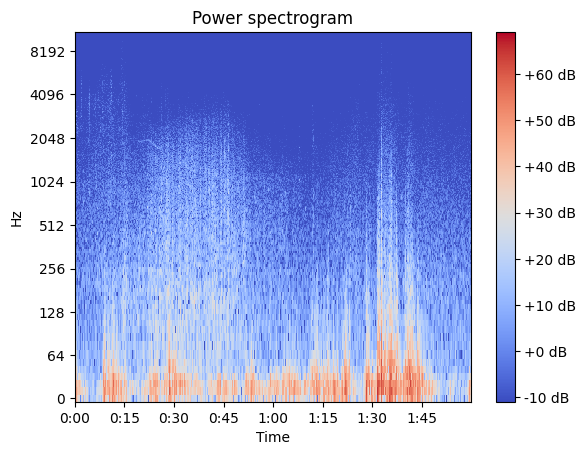

In [64]:
spectrum = librosa.stft(y=r3,center=False) 
spectrum = librosa.amplitude_to_db(spectrum).astype(float)
fig, ax = plt.subplots()
img = librosa.display.specshow(spectrum,y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show()

IndexError: list index out of range

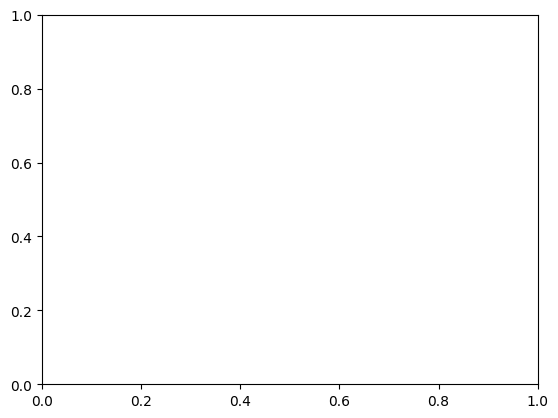

In [45]:
n_morceaux = spectrum.shape[1]//100
# machin = spectrum[:,:100].reshape(1,1025,100,1)

to_predict = np.array([spectrum[:,j*100:(j+1)*100] for j in range(n_morceaux)])

In [12]:
conv = load_model('Conv2D_2.h5')

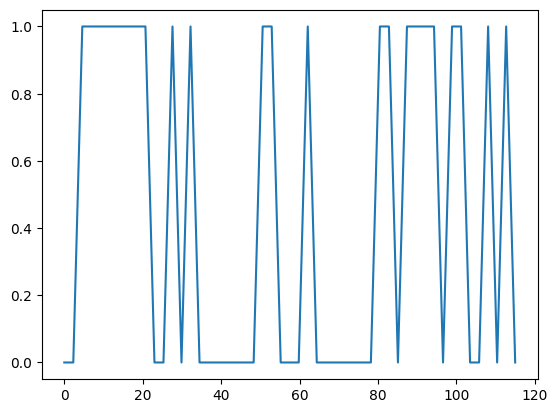

In [46]:
t = [i*2.3 for i in range(n_morceaux)]

plt.plot(t,np.around(conv(to_predict)))
plt.show()

In [97]:

spectrum1 = librosa.stft(y=r1,center=False) 
n_morceaux = spectrum1.shape[1]//100
machin1 = librosa.amplitude_to_db(spectrum1)[:,:100*n_morceaux].reshape(n_morceaux,1025,100,1)


spectrum4 = librosa.stft(y=r4,center=False) 
n_morceaux = spectrum4.shape[1]//100
machin4 = librosa.amplitude_to_db(spectrum1)[:,:100*n_morceaux].reshape(n_morceaux,1025,100,1)
machin1.shape,machin4.shape

((77, 1025, 100, 1), (5, 1025, 100, 1))

In [98]:
np.concatenate([machin4,machin1]).shape

(82, 1025, 100, 1)